<a href="https://colab.research.google.com/github/frankyehtw/hello-world/blob/master/%E3%80%8Cex06_regularization_ipynb%E3%80%8D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()      # 上傳檔案到 Colab
!ls

Saving pkgo_city66_class5_v1.csv to pkgo_city66_class5_v1.csv
pkgo_city66_class5_v1.csv  sample_data


In [2]:
import numpy as np
np.random.seed(1337)

my_data = np.genfromtxt('pkgo_city66_class5_v1.csv', delimiter=',',skip_header=1)

X_train = my_data[:,0:200]
X_train = X_train.astype('float32')

y_train = my_data[:,200]
y_train = y_train.astype('int')

import tensorflow
Y_train = tensorflow.keras.utils.to_categorical(y_train,5)

from sklearn.utils import shuffle
X_train,Y_train = shuffle(X_train,Y_train,random_state=100)

# set the size of mini-batch and number of epochs
batch_size = 16
epochs = 50

# Import keras to build a DL model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

### Step 1:  從 keras.regularizers 中 import l2 這種 regularizer 

In [3]:
# step 1 HERE
from tensorflow.keras.regularizers import l1,l2

### Step 2: 在前兩層的 Dense layer 中的 kernel_regularizer 設定使用 l2 regularizer 並且權重為 0.005

In [4]:
print('Building a model with regularizer L2')
model_l2 = Sequential()
model_l2.add(Dense(128, input_dim=200, kernel_regularizer=l2(0.005)))
model_l2.add(Activation('relu'))
model_l2.add(Dense(256, kernel_regularizer=l2(0.005)))
model_l2.add(Activation('relu'))
model_l2.add(Dense(5))
model_l2.add(Activation('softmax'))

Building a model with regularizer L2


In [5]:
# Setting optimizer as Adam
from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adagrad
model_l2.compile(loss= 'categorical_crossentropy',
                 optimizer='Adam',
                 metrics=['accuracy'])

# Fit models and use validation_split=0.1
history_l2 = model_l2.fit(X_train, Y_train,
                          batch_size=batch_size,
                          epochs=epochs,
                          verbose=0,
                          shuffle=True,
                          validation_split=0.1)

loss_l2 = history_l2.history.get('loss')
acc_l2 = history_l2.history.get('accuracy')
val_loss_l2 = history_l2.history.get('val_loss')
val_acc_l2 = history_l2.history.get('val_accuracy')

### model without regularizer for comparison 

In [6]:
# reference
model_adam = Sequential()
model_adam.add(Dense(128, input_dim=200))
model_adam.add(Activation('relu'))
model_adam.add(Dense(256))
model_adam.add(Activation('relu'))
model_adam.add(Dense(5))
model_adam.add(Activation('softmax'))

''' Setting optimizer as Adam '''
from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adagrad
model_adam.compile(loss= 'categorical_crossentropy',
                   optimizer='Adam',
                   metrics=['accuracy'])

'''Fit models and use validation_split=0.1 '''
history_adam = model_adam.fit(X_train, Y_train,
                              batch_size=batch_size,
                              epochs=epochs,
                              verbose=0,
                              shuffle=True,
                              validation_split=0.1)

''' Access the performance on validation data '''
loss_adam = history_adam.history.get('loss')
acc_adam = history_adam.history.get('accuracy')
val_loss_adam = history_adam.history.get('val_loss')
val_acc_adam = history_adam.history.get('val_accuracy')

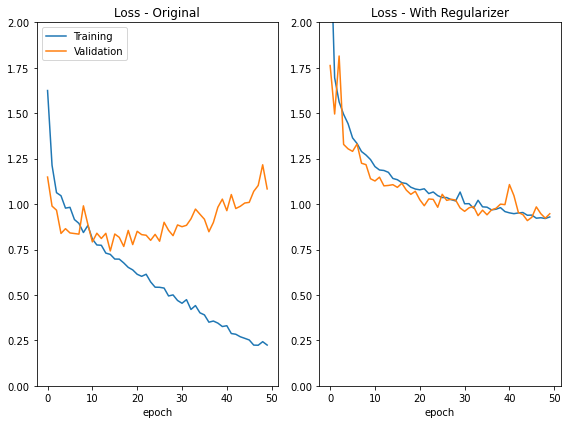

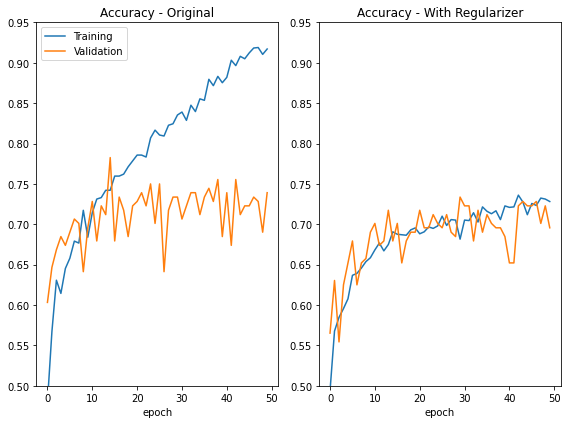

In [7]:
# Visualize the loss and accuracy of both models
import matplotlib.pyplot as plt
plt.figure(0,figsize=(8,6))
plt.subplot(121)
plt.plot(range(len(loss_adam)), loss_adam,label='Training')
plt.plot(range(len(val_loss_adam)), val_loss_adam,label='Validation')
plt.ylim([0,2])
plt.title('Loss - Original')
plt.xlabel("epoch")
plt.legend(loc='upper left')
plt.subplot(122)
plt.plot(range(len(loss_l2)), loss_l2,label='Training')
plt.plot(range(len(val_loss_l2)), val_loss_l2,label='Validation')
plt.ylim([0,2])
plt.title('Loss - With Regularizer')
plt.xlabel("epoch")
plt.tight_layout()
plt.show()


import matplotlib.pyplot as plt
plt.figure(1,figsize=(8,6))
plt.subplot(121)
plt.plot(range(len(acc_adam)), acc_adam,label='Training')
plt.plot(range(len(val_acc_adam)), val_acc_adam,label='Validation')
plt.ylim([0.5,0.95])
plt.title('Accuracy - Original')
plt.xlabel("epoch")
plt.legend(loc='upper left')
plt.subplot(122)
plt.plot(range(len(acc_l2)), acc_l2,label='Training')
plt.plot(range(len(val_acc_l2)), val_acc_l2,label='Validation')
plt.ylim([0.5,0.95])
plt.title('Accuracy - With Regularizer')
plt.xlabel("epoch")
plt.tight_layout()
plt.savefig('06_regularizer_acc.png',dpi=300,format='png')
plt.show()
